In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
from scipy.stats.mstats import winsorize 
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
    
    return dataframe    



In [129]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers



In [130]:
train_df = pd.read_csv("C:\\Users\\Dashang\\Downloads\\Github\\Stayze_Rent_Predicition\\Stayze_Rent_Predicition_Hackathon\\Dashang\\data\\Train.csv")

In [131]:
test_df = pd.read_csv("C:\\Users\\Dashang\\Downloads\\Github\\Stayze_Rent_Predicition\\Stayze_Rent_Predicition_Hackathon\\Dashang\\data\\Test.csv")

In [132]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [133]:
train_df.isna().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## Removal of Nulls

In [134]:
# removing NULL from name
train_df["name"] = train_df["name"].fillna(str(train_df['host_id']))

In [135]:
train_df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [136]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [137]:
train_df['last_review'] = pd.to_datetime(train_df['last_review'])

In [138]:
min_row = train_df[train_df['reviews_per_month']==0.01].min()
min_row

id                                                           59121
name                              2 BD / 2BA WITH GARDEN, SLEEPS 6
host_id                                                      31374
host_name                                                    Aaron
neighbourhood_group                                       Brooklyn
neighbourhood                                   Bedford-Stuyvesant
latitude                                                   40.6291
longitude                                                 -74.0021
room_type                                          Entire home/apt
price                                                           40
minimum_nights                                                   1
number_of_reviews                                                1
last_review                                    2011-03-28 00:00:00
reviews_per_month                                             0.01
calculated_host_listings_count                                

In [139]:
train_df['last_review'] = train_df['last_review'].fillna(min_row['last_review'])

In [140]:
train_df['reviews_per_month'] = train_df['reviews_per_month'].fillna(min_row['reviews_per_month'])

In [141]:
train_df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                         13
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [142]:
train_df["name"] = train_df["name"].fillna(str(train_df['host_id']))

In [143]:
train_df["host_name"] = train_df["host_name"].fillna(str(train_df['host_id']))

In [144]:
train_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [145]:
train_df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [146]:
detect_outliers(train_df)

,Feature,Number of Outliers
0,id,0
1,host_id,1057
2,latitude,301
3,longitude,1965
4,price,2114
5,minimum_nights,4581
6,number_of_reviews,4243
7,reviews_per_month,2235
8,calculated_host_listings_count,4930
9,availability_365,0


In [147]:
train_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [148]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,2011-03-28,0.01,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,2011-03-28,0.01,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


## Removal of unwanted columns

In [149]:
train_df = train_df.drop(['id','host_id','last_review','latitude','longitude','name','host_name'],axis=1)

In [150]:
train_df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Nolita,Private room,120,7,3,0.06,3,0
1,Manhattan,Upper West Side,Entire home/apt,1500,1,0,0.01,1,0
2,Queens,East Elmhurst,Entire home/apt,200,2,4,4.00,1,365
3,Staten Island,Concord,Shared room,30,2,0,0.01,4,82
4,Manhattan,Harlem,Shared room,115,1,16,0.27,1,365


## Seperate num cols and cat cols

In [151]:
#treat categorical data
# Split into categorical and numerical columns
train_df_cols = train_df.columns
num_train_df_cols = train_df.select_dtypes(exclude=['object','category']).columns
cat_train_df_cols = [i for i in train_df_cols if i not in train_df[num_train_df_cols].columns]

In [152]:
cat_train_df_cols

['neighbourhood_group', 'neighbourhood', 'room_type']

In [153]:
num_train_df_cols

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## checking target variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171C50881C8>,
      dtype=object)

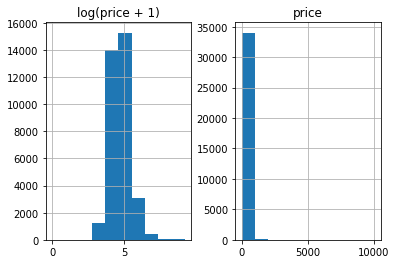

In [154]:
prices = pd.DataFrame({"price":train_df["price"], "log(price + 1)":np.log1p(train_df["price"])})
prices.hist()

## checking numerical features

In [117]:
## dist plot

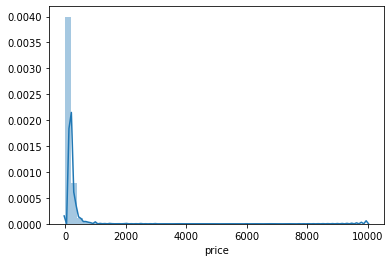

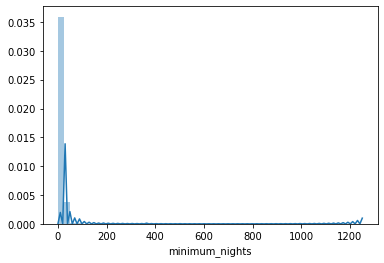

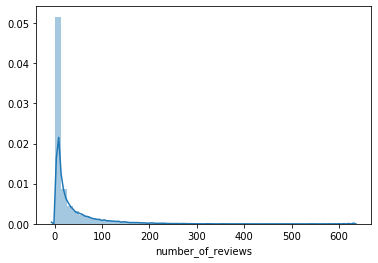

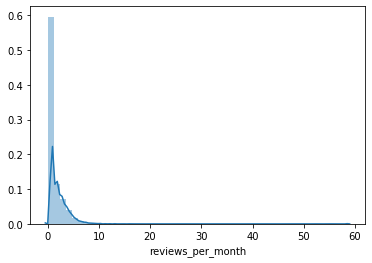

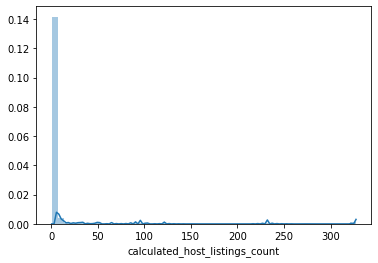

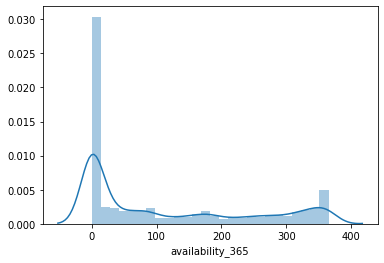

In [155]:
for num in num_train_df_cols:
    sns.distplot(train_df[num])
    plt.show()

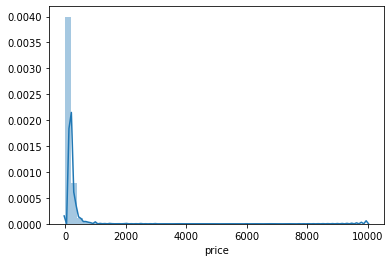

In [156]:
sns.distplot(train_df['price']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171C6943748>,
      dtype=object)

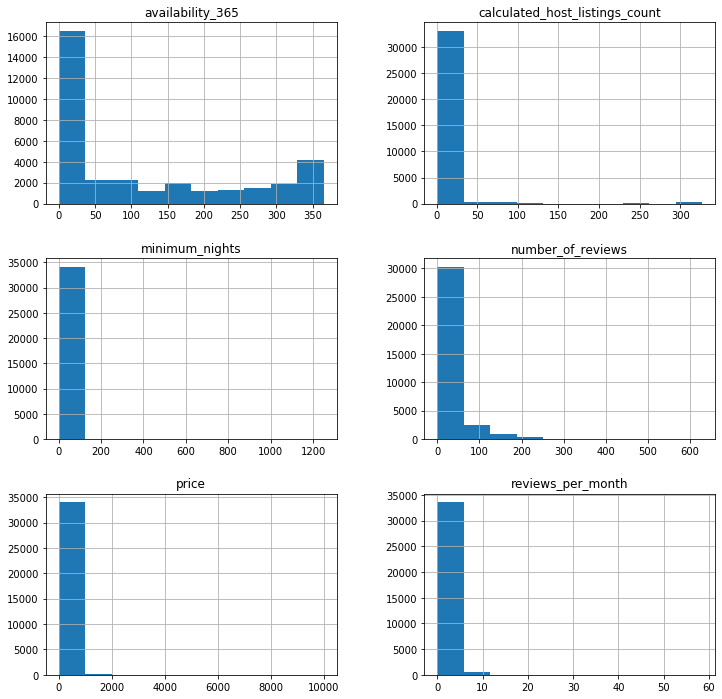

In [157]:
train_df[num_train_df_cols].hist(figsize=(12,12))

## check for Numerical Data Skewness

In [158]:
train_df[num_train_df_cols].skew()

price                             18.815094
minimum_nights                    23.999268
number_of_reviews                  3.645365
reviews_per_month                  3.633488
calculated_host_listings_count     7.969708
availability_365                   0.755991
dtype: float64

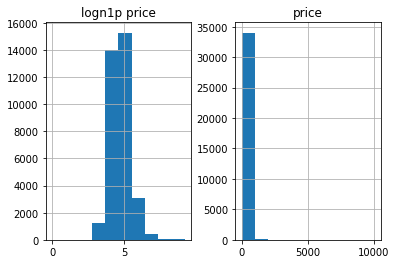

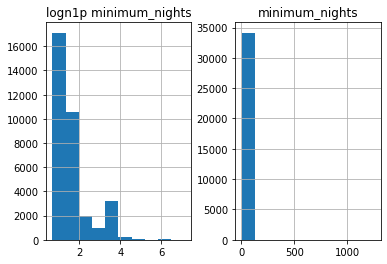

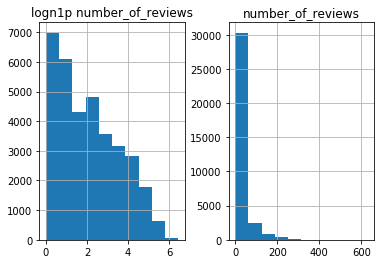

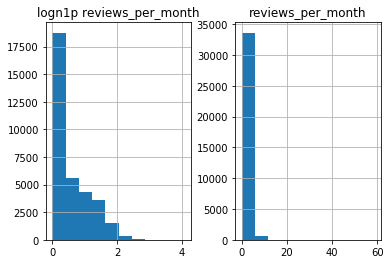

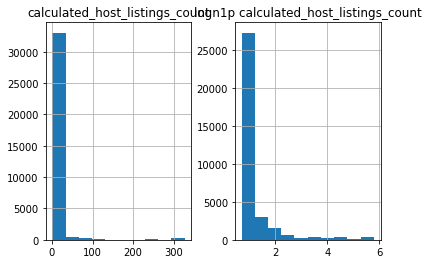

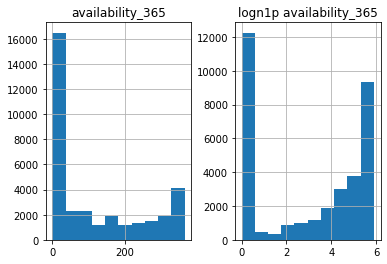

In [166]:
for num in num_train_df_cols:
    prices = pd.DataFrame({str(num):train_df[num], "logn1p "+num:np.log1p(train_df[num])})
    prices.hist()
    plt.show()

In [167]:
#log transform skewed numeric features:
numeric_feats = train_df.dtypes[train_df.dtypes != "object"].index

skewed_feats = train_df[numeric_feats].apply(lambda x: x.skew()) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index



In [169]:
skewed_feats

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [170]:
train_df[skewed_feats] = np.log1p(train_df[skewed_feats])

In [171]:
train_df[num_train_df_cols].skew()

price                             0.551689
minimum_nights                    1.496255
number_of_reviews                 0.357686
reviews_per_month                 0.950751
calculated_host_listings_count    3.303858
availability_365                 -0.200836
dtype: float64

## Detect and removal of Outlier

In [172]:
detect_outliers(train_df)

,Feature,Number of Outliers
0,price,458
1,minimum_nights,539
2,number_of_reviews,0
3,reviews_per_month,81
4,calculated_host_listings_count,3907
5,availability_365,0


In [173]:
train_df = treat_outliers(train_df)

In [174]:
detect_outliers(train_df)

,Feature,Number of Outliers
0,price,0
1,minimum_nights,0
2,number_of_reviews,0
3,reviews_per_month,0
4,calculated_host_listings_count,3907
5,availability_365,0


## categorical to numerical


In [175]:
train_df.shape

(34226, 9)

In [176]:
train_df_with_dummies = pd.get_dummies(train_df)

In [178]:
train_df_with_dummies.shape

(34226, 231)

In [180]:
train_df.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [181]:
train_df_with_dummies.dtypes

price                             float64
minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
                                   ...   
neighbourhood_Woodlawn              uint8
neighbourhood_Woodside              uint8
room_type_Entire home/apt           uint8
room_type_Private room              uint8
room_type_Shared room               uint8
Length: 231, dtype: object

In [182]:
train_df_with_dummies.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,4.795791,2.079442,1.386294,0.058269,1.386294,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5.602119,0.693147,0.000000,0.009950,0.693147,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,5.303305,1.098612,1.609438,1.449269,0.693147,5.826000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3.912023,1.098612,0.000000,0.009950,1.609438,4.418841,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.753590,0.693147,2.833213,0.239017,0.693147,5.826000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Checking data Normal Dist

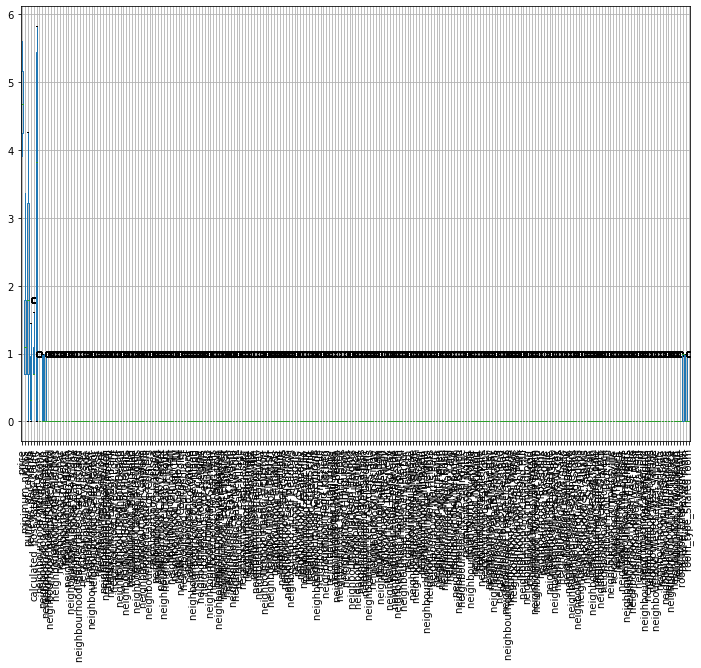

In [183]:
train_df_with_dummies.boxplot(figsize=(12,8),rot=90)

In [69]:
train_df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Nolita,Private room,4.795791,7,3,0.06,3,0
1,Manhattan,Upper West Side,Entire home/apt,7.313887,1,0,0.01,1,0
2,Queens,East Elmhurst,Entire home/apt,5.303305,2,4,4.00,1,365
3,Staten Island,Concord,Shared room,3.433987,2,0,0.01,4,82
4,Manhattan,Harlem,Shared room,4.753590,1,16,0.27,1,365


## Scaling

In [186]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [81]:
# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)


MemoryError: 

In [184]:
X=train_df_with_dummies.drop(['price'],axis=1)

In [187]:
y=train_df.price

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72)

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,mean_squared_log_error,r2_score

In [192]:
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print('Train RMSE:',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Train RMSE: 0.33962732284504127
Test RMSE: 78832235.46161984


In [ ]:
test_df

In [65]:
testdt['cc_cons'] = lr.predict(testdt)

In [66]:
testdt['cc_cons'] = np.exp(testdt['cc_cons'])-1

In [67]:
submissions_lr = pd.concat([test_id_col, testdt['cc_cons']], axis=1) 


In [68]:
submissions_lr.to_csv('submission_LinearReg.csv', index=False) 

In [69]:
submissions_lr